In [1]:
import pandas as pd 
import numpy as np
data = pd.read_csv('skroutz_cookers.csv')
data.head()

,43637,entichizomenos fournos ano pagkou indesit ifw 6841 jh/ix,2870,3927,Indesit IFW 6841 JH IX,929,Cookers & Ovens
0,43638,entichizomenos fournos ano pagkou indesit ifw ...,4744,3927,Indesit IFW 6841 JH IX,929,Cookers & Ovens
1,43639,entichizomenos fournos indesit ifw 6841 jh/ix,4599,3927,Indesit IFW 6841 JH IX,929,Cookers & Ovens
2,43640,indesit ifw 6841 jh ix fournos entichizomenos ...,3954,3927,Indesit IFW 6841 JH IX,929,Cookers & Ovens
3,43641,indesit ifw 6841 jh ix fournos,1306,3927,Indesit IFW 6841 JH IX,929,Cookers & Ovens
4,43642,indesit ifw6841jhix entichizomenos fournos 71l...,3715,3927,Indesit IFW 6841 JH IX,929,Cookers & Ovens


In [2]:
data = data.drop(['43637', 'Cookers & Ovens', '929'],1 )
from sklearn.preprocessing import LabelEncoder
data = data.apply(LabelEncoder().fit_transform)
data.head()

,entichizomenos fournos ano pagkou indesit ifw 6841 jh/ix,2870,3927,Indesit IFW 6841 JH IX
0,1939,148,0,291
1,2084,146,0,291
2,3460,136,0,291
3,3457,28,0,291
4,3476,132,0,291


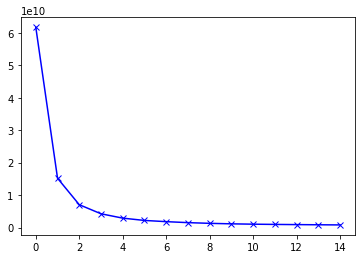

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 16):
    kmeans = KMeans(i, n_init=15)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(wcss, 'bx-')
plt.show()


In [4]:
kmeans = KMeans(3)
Y_kmeans = kmeans.fit_predict(data)


from sklearn.decomposition import PCA
pca = PCA(2)
x = pca.fit_transform(data)

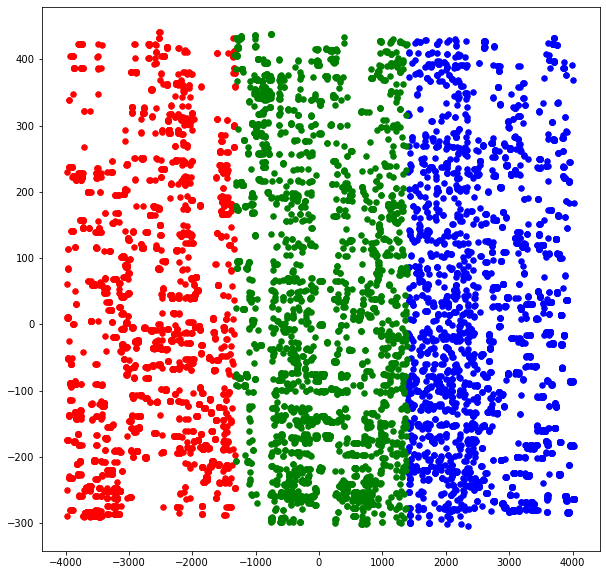

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(x[Y_kmeans==0, 0], x[Y_kmeans==0, 1], s=30, c='red', label='Cluster 1')
plt.scatter(x[Y_kmeans==1, 0], x[Y_kmeans==1, 1], s=30, c='blue', label='Cluster 2')
plt.scatter(x[Y_kmeans==2, 0], x[Y_kmeans==2, 1], s=30, c='green', label='Cluster 3')
plt.show()
